First 5 rows:
    Gender      Customer Type   Type of Travel     Class  \
0    Male     Loyal Customer  Personal Travel  Eco Plus   
1    Male  disloyal Customer  Business travel  Business   
2  Female     Loyal Customer  Business travel  Business   
3  Female     Loyal Customer  Business travel  Business   
4    Male     Loyal Customer  Business travel  Business   

              satisfaction  Age  Flight Distance  Inflight entertainment  \
0  neutral or dissatisfied   13              460                       5   
1  neutral or dissatisfied   25              235                       1   
2                satisfied   26             1142                       5   
3  neutral or dissatisfied   25              562                       2   
4                satisfied   61              214                       3   

   Baggage handling  Cleanliness  Departure Delay in Minutes  \
0                 4            5                          25   
1                 3            1             

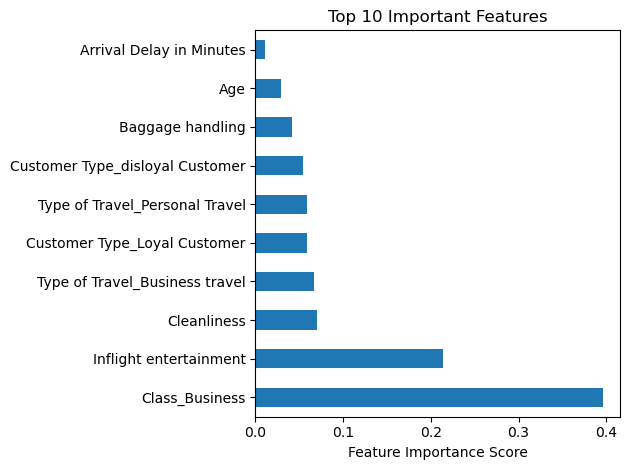

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv("cust_satisfaction.csv")
print("First 5 rows:\n", df.head())


df = df.dropna()


X = df.drop("satisfaction", axis=1)
y = df["satisfaction"]



X = pd.get_dummies(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.xlabel("Feature Importance Score")
plt.tight_layout()
plt.show()
